In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np

(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

print(f"Training data shape: {train_images.shape}")
print(f"Test data shape: {test_images.shape}")

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training data shape: (60000, 28, 28, 1)
Test data shape: (10000, 28, 28, 1)


In [2]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 121,930 (476.29 KB)

 Trainable params: 121,930 (476.29 KB)

 Non-trainable params: 0 (0.00 B)

In [3]:
print("Training the model...")
history = model.fit(train_images, train_labels, epochs=5,
                    validation_data=(test_images, test_labels),
                    batch_size=64)

Training the model...
Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 51s 53ms/step - accuracy: 0.8850 - loss: 0.3877 - val_accuracy: 0.9774 - val_loss: 0.0697
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 50s 53ms/step - accuracy: 0.9838 - loss: 0.0529 - val_accuracy: 0.9824 - val_loss: 0.0516
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 49s 52ms/step - accuracy: 0.9893 - loss: 0.0347 - val_accuracy: 0.9881 - val_loss: 0.0358
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 83s 53ms/step - accuracy: 0.9922 - loss: 0.0260 - val_accuracy: 0.9909 - val_loss: 0.0274
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 49s 52ms/step - accuracy: 0.9936 - loss: 0.0200 - val_accuracy: 0.9902 - val_loss: 0.0302


313/313 - 3s - 8ms/step - accuracy: 0.9902 - loss: 0.0302

Final Test Accuracy: 99.02%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


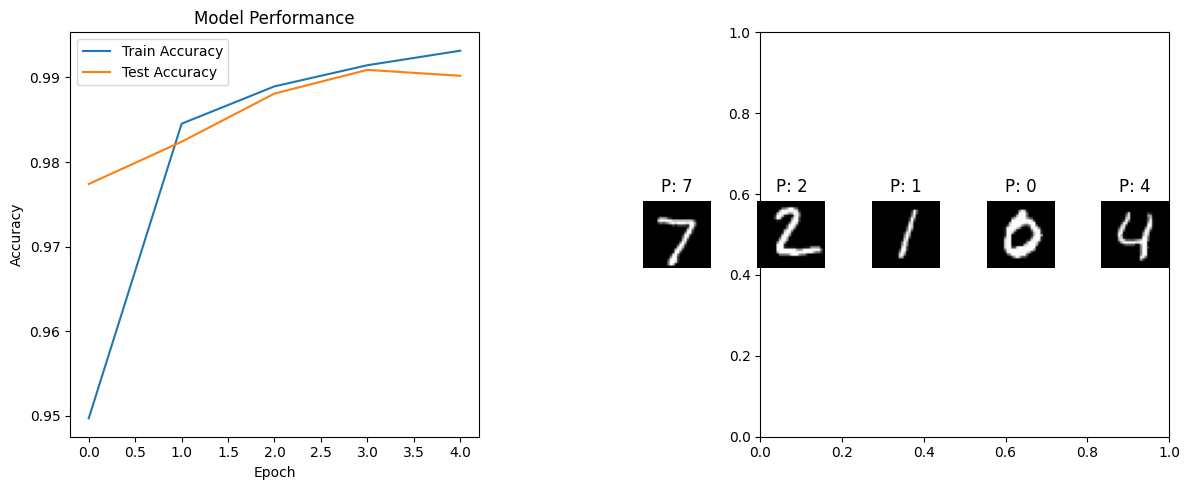

In [4]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'\nFinal Test Accuracy: {test_acc*100:.2f}%')

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Performance')

plt.subplot(1, 2, 2)
predictions = model.predict(test_images[:10])
for i in range(5):
    plt.subplot(1, 10, i+6)
    plt.imshow(test_images[i].reshape(28, 28), cmap='gray')
    plt.title(f"P: {np.argmax(predictions[i])}")
    plt.axis('off')

plt.tight_layout()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
The model predicts this digit is a: 9


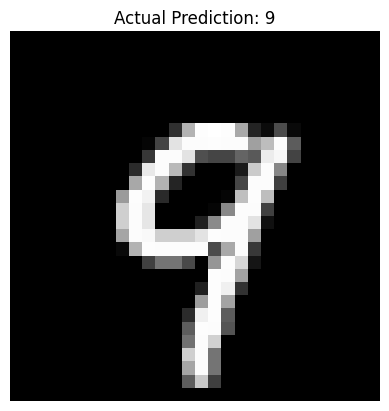

In [6]:

sample_image = test_images[12]

prediction_probabilities = model.predict(sample_image.reshape(1, 28, 28, 1))

simple_prediction = np.argmax(prediction_probabilities)

print(f"The model predicts this digit is a: {simple_prediction}")

plt.imshow(sample_image.reshape(28, 28), cmap='gray')
plt.title(f"Actual Prediction: {simple_prediction}")
plt.axis('off')
plt.show()